In [ ]:
# loading libraries
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
from keras import backend as K
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model


In [ ]:
!pip install gdal

In [13]:
from osgeo import gdal
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

def read_as_array(path,file_name):

    gdal_file=gdal.Open(path+'/'+file_name)

    array=np.zeros((gdal_file.RasterYSize,gdal_file.RasterXSize,gdal_file.RasterCount))
    
    for i in range(gdal_file.RasterCount):

        gdal_file_band=gdal_file.GetRasterBand(i+1)

        array[:,:,i]=gdal_file_band.ReadAsArray()
        
    return(array) 

#path='D:/Nafiseh/flood_proposal'

path='//tsclient/F/RCM_Abbotsford_Rural'

#GRD_SLC_stack_train_name='Stack_GRD_SLC.tif'

#GRD_SLC_stack_test_name='Stack_GRD_SLC_test.tif'

#dem_name='dem_gatineau.tif'
#dem_name='Abbotsford_dem_2012.tif'
#dem_name='DEM.tif'
dem_name='subset_0_of_DEM.tif'
#dem_name='dem_leverkhuzen_SRTMGL1.tif'
dem_name_test='New folder (2)/subset_1_of_DEM.tif'

#train_name='collocate_int_coh_leverkhuzen_2.tif'

#train_name='stack_train_RCM_3_20211118_1130.tif'

train_name='subset_0_of_Stack_train_RCM_3_20211118_1130.tif'

#train_name='Stack_GRD_SLC.tif'


#test_name='collocate_S1B_int_coh.tif'
#test_name='stack_test_RCM_2_3_2021119_1130.tif'

test_name='New folder (2)/subset_1_of_Stack_test_RCM_2_3_20211119_1130.tif'

#test_name='Stack_GRD_SLC_test.tif'

#gt_name='hydrography_area_mask_leverkhuzen.tif'
#gt_name='binary_subset_edge_modified_ground_truth.tif'
#gt_name='New Folder/FloodExtentPolygon_CAN_BC_LowerFraser_20211116_020551.tif'
gt_name='New folder (2)/subset_1_of_FloodExtentPolygon_CAN_BC_LowerFraser_20211116_020551.tif'


train_array_int=read_as_array(path,train_name)

temp=train_array_int
temp[temp==0]=10**-10
stack_train_int=np.log10(temp) #vv channel for S1 #HH and HV channels for RCM
#stack_train_int=train_array_int

gt=np.squeeze(read_as_array(path,gt_name),axis=2)
dem=read_as_array(path,dem_name)
dem_test=read_as_array(path,dem_name_test)

test_array_int=read_as_array(path,test_name)
temp_=test_array_int
##temp_=np.copy(test_array)
temp_[temp_==0]=10**-10
stack_test_int=np.log10(temp_) #vv channel for S1 #HH and HV channels for RCM
#stack_test_int=test_array_int

#stack_test_int=zoom(stack_test_int,(gt.shape[0]/stack_test_int.shape[0],gt.shape[1]/stack_test_int.shape[1],1),order=1)

row,col=train_array_int.shape[0],train_array_int.shape[1]

row_test,col_test=test_array_int.shape[0],test_array_int.shape[1]

dem_row,dem_col=dem.shape[0],dem.shape[1]

dem_row_test,dem_col_test=dem_test.shape[0],dem_test.shape[1]

dem_r=zoom(dem,(row/dem_row,col/dem_col,1),order=0)
dem_r_test=zoom(dem_test,(row_test/dem_row_test,col_test/dem_col_test,1),order=0)
#dem_r_test=zoom(dem,(gt.shape[0]/dem_row,gt.shape[1]/dem_col,1),order=0)

#GRD_SLC_stack_train_s_db=np.concatenate((stack_train_int[:,:,[0,1,2,3,5,6,8,9]],dem_r),axis=2)

#GRD_SLC_stack_train_s=stack_train_int[:,:,[0,1,2,3,5,6,8,9]]

#GRD_SLC_stack_train_s=train_array_int[780:1080,0:300,[2,3,9,10,12,13,14,15]]

GRD_SLC_stack_train_s_db=np.concatenate((stack_train_int,dem_r),axis=2)

#GRD_SLC_stack_test_s=stack_test_int[:,:,[0,1,2,3,5,6,8,9]]

#GRD_SLC_stack_test_s_db=np.concatenate((stack_test_int[:,:,[0,1,2,3,5,6,8,9]],dem_r_test),axis=2)

#GRD_SLC_stack_test_s=test_array_int[780:1080,0:300,[2,3,9,10,11,12,13,14]]

GRD_SLC_stack_test_s_db=np.concatenate((stack_test_int,dem_r_test),axis=2)

#GRD_SLC_stack_train_s_db=np.concatenate((stack_train_int,dem_r),axis=2)

#GRD_SLC_stack_test_s_db=np.concatenate((stack_test_int,dem_r_test),axis=2)


#GRD_SLC_stack_train_s=np.concatenate((stack_train_int[780:1080,0:300,[2,3,9,10,12,13,14,15]],dem_r),axis=2)

#GRD_SLC_stack_test_s=np.concatenate((stack_test_int[780:1080,0:300,[2,3,9,10,11,12,13,14]],dem_r),axis=2)


print(GRD_SLC_stack_train_s_db.shape,GRD_SLC_stack_test_s_db.shape)

C:\Users\nghasem2\AppData\Local\Temp\ipykernel_18212\4243164212.py:61: RuntimeWarning: invalid value encountered in log10
  stack_train_int=np.log10(temp) #vv channel for S1 #HH and HV channels for RCM


(1093, 1821, 5) (1592, 2421, 5)


In [14]:
print(GRD_SLC_stack_test_s_db)

[[[-1.6287419  -2.24974431 -0.54303179 -1.68077056 66.        ]
  [-1.54918944 -2.23669225 -0.55629917 -1.74637502 66.        ]
  [-1.47948501 -2.17041159 -0.53660975 -1.78550774 66.        ]
  ...
  [-1.7202998  -1.78562766 -0.53138848 -1.56372625  7.        ]
  [-1.4652275  -1.61232552 -0.60937394 -1.6217074   7.        ]
  [-0.97184363 -1.52235084 -0.66085912 -1.68104452  7.        ]]

 [[-1.56898283 -2.15401441 -0.53710266 -1.71356455 66.        ]
  [-1.49064645 -2.19006794 -0.55202608 -1.76938397 66.        ]
  [-1.41134743 -2.23243748 -0.56039351 -1.67470756 66.        ]
  ...
  [-1.50231043 -1.6680999  -0.5938803  -1.46606235  7.        ]
  [-1.38777655 -1.61119899 -0.65799688 -1.54536287  7.        ]
  [-0.95554077 -1.54569795 -0.66085678 -1.58326022  7.        ]]

 [[-1.38806737 -2.16664466 -0.58084103 -1.67588463 66.        ]
  [-1.34757533 -2.19147663 -0.62598663 -1.61751064 66.        ]
  [-1.30465781 -2.22480493 -0.65354124 -1.43174322 66.        ]
  ...
  [-1.4583751  -1.

# Save Data

In [15]:
import numpy as np

np.savez('//tsclient/F/RCM_Abbotsford_Rural/RCM_STACK_train_and_test_abbotsford_rural.npz',train=GRD_SLC_stack_train_s_db,test=GRD_SLC_stack_test_s_db)

# Load Data

In [ ]:
import numpy as np

data=np.load('//tsclient/F/RCM_Abbotsford_Rural/RCM_STACK_train_and_test_abbotsford_rural.npz')

GRD_SLC_stack_train_s_db,GRD_SLC_stack_test_s_db=data['train'],data['test']

GRD_SLC_stack_train_s_db=GRD_SLC_stack_train_s_db[:,:1750,:]

GRD_SLC_stack_test_s_db=GRD_SLC_stack_test_s_db[:,:1750,:]

# Comparison with Simple Log-Ratio method

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from scipy.ndimage import zoom
import skimage


fig,ax=plt.subplots(2,1,figsize=(10,5))

axes=np.ravel(ax)

gt=read_as_array('D:/Nafiseh/flood_proposal/','hydrography_area_mask_leverkhuzen_clip.tif')

log_ratio=np.log10(test_array_int[:,:,3]/test_array_int[:,:,1]) #log10(co/pre)

log_ratio[~np.isfinite(log_ratio)]=0

otsu_threshold=skimage.filters.threshold_otsu(log_ratio)

log_ratio[log_ratio>otsu_threshold]=1

log_ratio[log_ratio<=otsu_threshold]=0

log_ratio_r=zoom(log_ratio,[gt.shape[0]/log_ratio.shape[0],gt.shape[1]/log_ratio.shape[1]],order=0)

im=axes[0].imshow(log_ratio_r)

axes[0].axis('off')

im=axes[1].imshow(gt)

axes[1].axis('off')

cax_colorbar=fig.add_axes([0.65, 0.15, 0.05, 0.7])

cb=fig.colorbar(im,ticks=[0,1],cax=cax_colorbar)

cb.set_ticklabels(['background','flood/water bodies'],fontsize='x-large')

plt.show()

In [ ]:
conf_log_ratio=confusion_matrix(np.ravel(gt),np.ravel(log_ratio_r))
print(classification_report(np.ravel(gt),np.ravel(log_ratio_r)))

In [ ]:
!pip install scikit-image

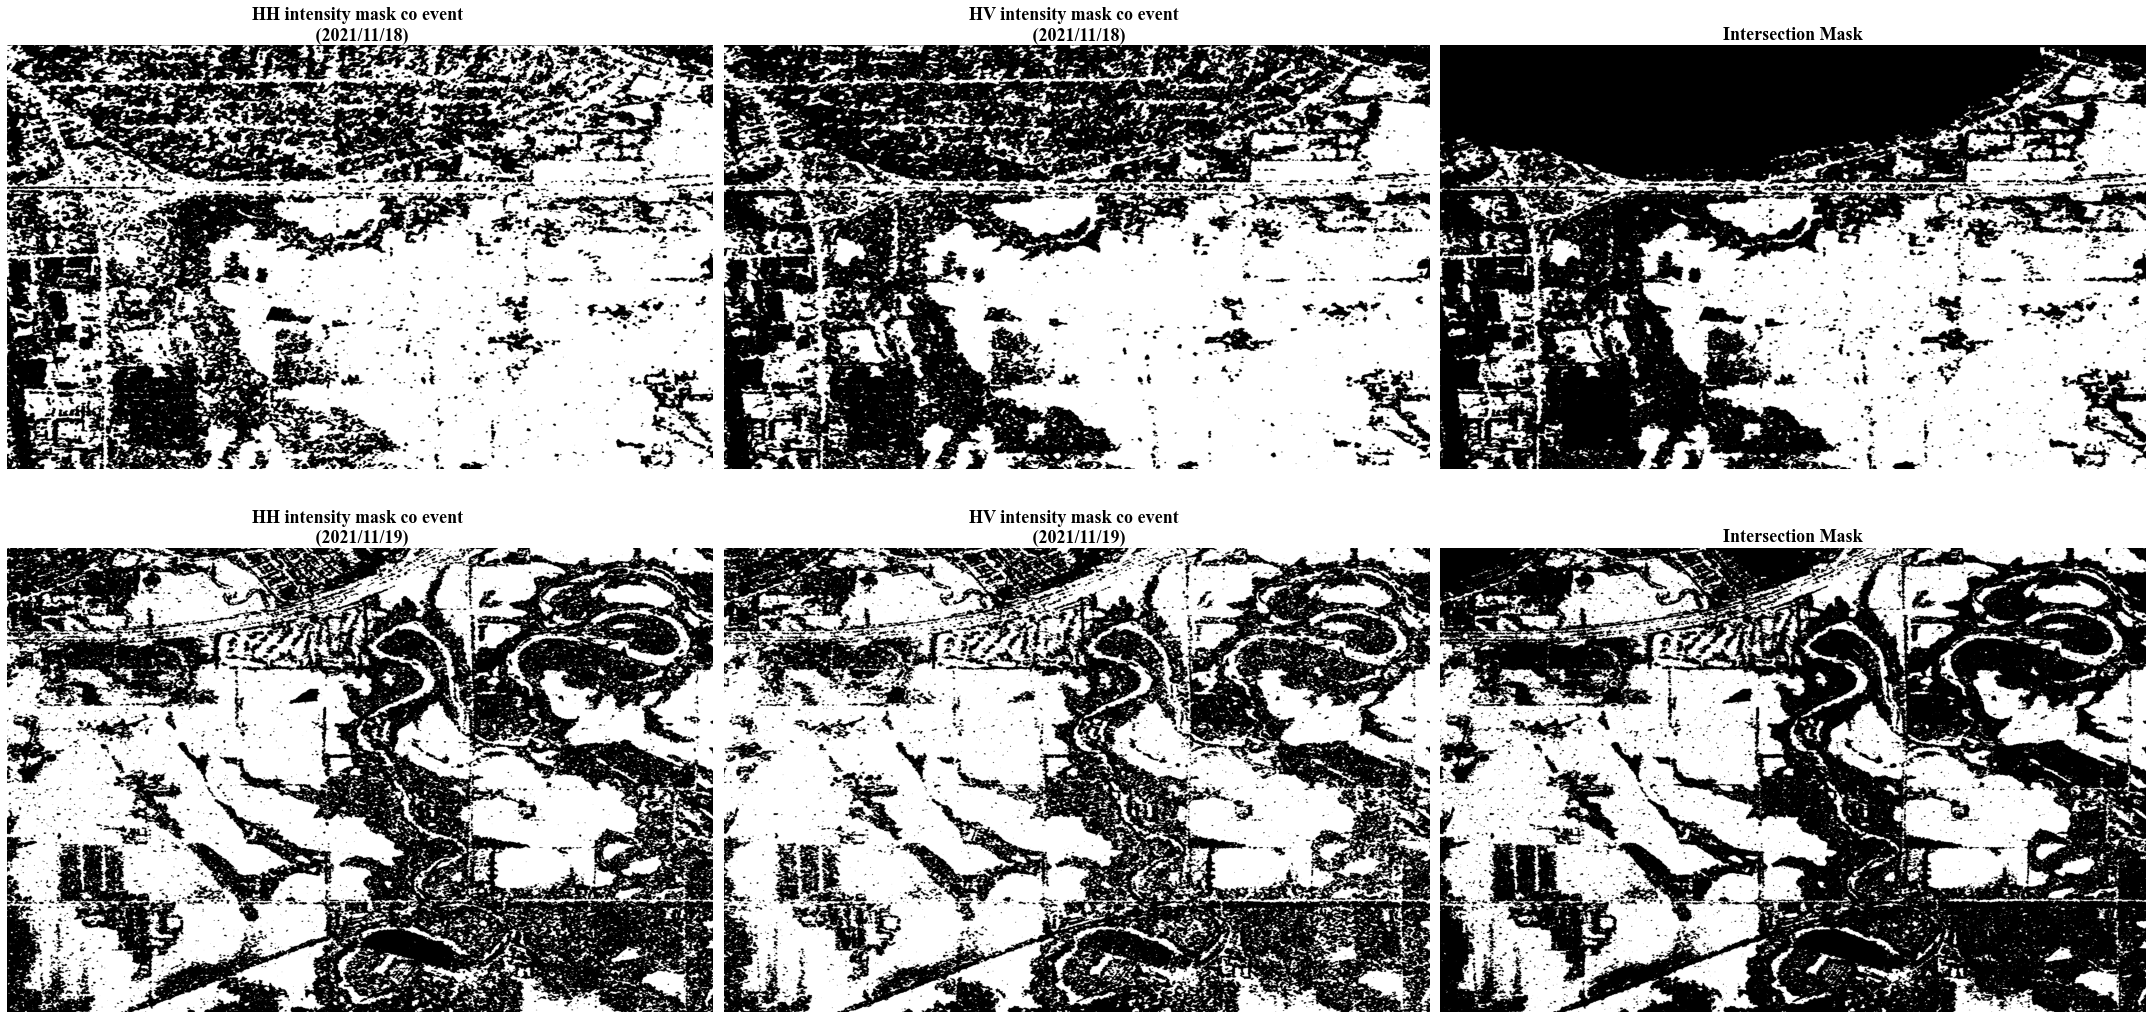

In [22]:
%matplotlib inline
import skimage

from scipy.ndimage import zoom

import matplotlib.pyplot as plt

def getThreshold(data):
    
    n = data.shape[2]
    
    threshold = []
    
    for i in range(n):
        
        band_data = data[:,:,i]

        # calculate threshold using Otsu method
        threshold_otsu = skimage.filters.threshold_otsu(band_data)
        # calculate threshold using minimum method
        threshold_minimum = skimage.filters.threshold_minimum(band_data)
        # get number of pixels for both thresholds
        numPixOtsu = len(band_data[abs(band_data - threshold_otsu) < 0.1])
        numPixMinimum = len(band_data[abs(band_data - threshold_minimum) < 0.1])

        # if number of pixels at minimum threshold is less than 1% of number of pixels at Otsu threshold
        if abs(numPixMinimum/(numPixOtsu+1)) < 0.01:
            # adjust band data according
            if threshold_otsu < threshold_minimum:
                
                band_data = band_data[band_data < threshold_minimum]
                
                if np.any(band_data!=np.mean(np.ravel(band_data))):
                    
                    threshold_minimum = skimage.filters.threshold_minimum(band_data)
            else:
                
                band_data = band_data[band_data > threshold_minimum]
                threshold_minimum = skimage.filters.threshold_minimum(band_data)

            numPixMinimum = len(band_data[abs(band_data - threshold_minimum) < 0.1])

        # select final threshold
        if abs(numPixMinimum/(numPixOtsu+1)) < 0.01:
            threshold.append(threshold_otsu)
        else:
            threshold.append(threshold_minimum)

    return threshold

#dem_name='Abbotsford_dem_2012.tif'
#dem_name='DEM.tif'
dem_name='subset_0_of_DEM.tif'
#dem_name='dem_gatineau.tif'
#dem_name='dem_leverkhuzen_SRTMGL1.tif'
dem_name_test='New folder (2)/subset_1_of_DEM.tif'

dem=read_as_array(path,dem_name)

dem_test=read_as_array(path,dem_name_test)

dem_row,dem_col=dem.shape[0],dem.shape[1]

dem_row_test,dem_col_test=dem_test.shape[0],dem_test.shape[1]

#stack_train_int_coh=GRD_SLC_stack_train_s[:,:,[3,7]]
stack_train_int_coh=GRD_SLC_stack_train_s_db #HH and HV bands

#stack_test_int_coh=GRD_SLC_stack_test_s[:,:,[3,7]]
stack_test_int_coh=GRD_SLC_stack_test_s_db #HH and HV bands


row=stack_train_int_coh.shape[0]
col=stack_train_int_coh.shape[1]

row1=stack_test_int_coh.shape[0]
col1=stack_test_int_coh.shape[1]


dem_r=zoom(dem,(row/dem_row,col/dem_col,1),order=0)

dem_r_test=zoom(dem_test,(row1/dem_row_test,col1/dem_col_test,1),order=0)

dem_threshold=getThreshold(dem_r)

dem_threshold_test=getThreshold(dem_r_test)
int_thresholds=[]

#int_thresholds=getThreshold(np.divide(np.nan_to_num(stack_train_int_coh),256))
#int_thresholds=getThreshold(np.nan_to_num(stack_train_int_coh))
for i in range(stack_train_int_coh.shape[2]):
    
    int_thresholds.append(skimage.filters.threshold_otsu(np.nan_to_num(stack_train_int_coh[:,:,i])))

#int_thresholds_test=getThreshold(np.divide(np.nan_to_num(stack_test_int_coh),256))
int_thresholds_test=getThreshold(np.nan_to_num(stack_test_int_coh))

#mask_vv_pre=np.zeros((row,col))
mask_vv_co=np.zeros((row,col))
mask_vv_coh_co=np.zeros((row,col))
mask_intersection=np.zeros((row,col))
mask_union=np.zeros((row,col))
mask_union_test=np.zeros((row1,col1))
mask_intersection_test=np.zeros((row1,col1))
mask_vv_co_test=np.zeros((row1,col1))
mask_vv_coh_co_test=np.zeros((row1,col1))

##mask_vv_pre[stack_train_int[:,:,0]<int_thresholds[0]]=1

mask_vv_co[stack_train_int_coh[:,:,0]<int_thresholds[0]]=1 #co_event vv:sentinel-1; hh:RCM

mask_vv_coh_co[stack_train_int_coh[:,:,1]<int_thresholds[1]]=1 #co_event coh:sentinel-1; hv (intensity):RCM

mask_intersection[(mask_vv_co==1) & (mask_vv_coh_co==1) & (np.squeeze(dem_r,axis=2)<dem_threshold[0])]=1

mask_union[((mask_vv_co==1) | (mask_vv_coh_co==1)) & (np.squeeze(dem_r,axis=2)<dem_threshold[0])]=1

mask_vv_co_test[stack_test_int_coh[:,:,0]<int_thresholds_test[0]]=1 #co_event

mask_vv_coh_co_test[stack_test_int_coh[:,:,1]<int_thresholds_test[1]]=1

mask_union_test[((mask_vv_co_test==1) | (mask_vv_coh_co_test==1)) & (np.squeeze(dem_r_test,axis=2)<dem_threshold_test[0])]=1

mask_intersection_test[(mask_vv_co_test==1) & (mask_vv_coh_co_test==1) & (np.squeeze(dem_r_test,axis=2)<dem_threshold_test[0])]=1

fig,ax=plt.subplots(2,3,figsize=(30,15))

orig_cmap=plt.cm.get_cmap('binary')

reversed_cmap=orig_cmap.reversed()

ax[0,0].imshow(mask_vv_co, cmap=reversed_cmap)

ax[0,0].axis('off')

ax[0,0].set_title('HH intensity mask co event \n (2021/11/18)',fontname='Times New Roman', fontweight='bold', fontsize=18)

#ax[0,0].set_title('VV intensity mask co event \n (2021/07/18)',fontname='Times New Roman', fontweight='bold', fontsize=14)

#ax[0,0].set_title('VV intensity mask co event \n (2019/04/25)',fontname='Times New Roman', fontweight='bold', fontsize=14)

ax[0,1].imshow(mask_vv_coh_co, cmap=reversed_cmap)

ax[0,1].axis('off')

ax[0,1].set_title('HV intensity mask co event \n (2021/11/18)',fontname='Times New Roman', fontweight='bold', fontsize=18)

#ax[0,1].set_title('VV coherency mask co event \n (2019/04/08-05/02)',fontname='Times New Roman', fontweight='bold', fontsize=14)

#ax[0,1].set_title('VV coherency mask co event \n (2021/07/06-07/18)',fontname='Times New Roman', fontweight='bold', fontsize=14)

ax[0,2].imshow(mask_intersection, cmap=reversed_cmap)

ax[0,2].axis('off')

ax[0,2].set_title('Intersection Mask',fontname='Times New Roman', fontweight='bold', fontsize=18)

ax[1,0].imshow(mask_vv_co_test, cmap=reversed_cmap)

ax[1,0].axis('off')

ax[1,0].set_title('HH intensity mask co event \n (2021/11/19)',fontname='Times New Roman', fontweight='bold', fontsize=18)

#ax[1,0].set_title('VV intensity mask co event \n (2019/05/07)',fontname='Times New Roman', fontweight='bold', fontsize=14)

#ax[1,0].set_title('VV intensity mask co event \n (2021/07/16)',fontname='Times New Roman', fontweight='bold', fontsize=14)

ax[1,1].imshow(mask_vv_coh_co_test, cmap=reversed_cmap)

ax[1,1].axis('off')

ax[1,1].set_title('HV intensity mask co event \n (2021/11/19)',fontname='Times New Roman', fontweight='bold', fontsize=18)

#ax[1,1].set_title('VV coherency mask co event \n (2019/04/08-05/14)',fontname='Times New Roman', fontweight='bold', fontsize=14)

#ax[1,1].set_title('VV coherency mask co event \n (2021/07/07-07/19)',fontname='Times New Roman', fontweight='bold', fontsize=14)

ax[1,2].imshow(mask_intersection_test, cmap=reversed_cmap)

ax[1,2].set_title('Intersection Mask',fontname='Times New Roman', fontweight='bold', fontsize=18)

ax[1,2].axis('off')

plt.tight_layout()

#plt.savefig('D:/Nafiseh/flood_proposal/subset_0_of_RCM_Abbotsford_Rural_intersection_combined_otsu_minimum_thresholding_methods.tif')

plt.show()

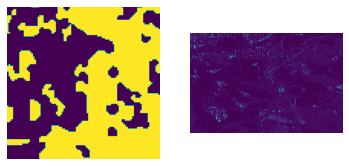

In [8]:
from osgeo import gdal

import matplotlib.pyplot as plt

gt=gdal.Open('//tsclient/F/RCM_Abbotsford_Rural/New folder (2)/subset_1_of_FloodExtentPolygon_CAN_BC_LowerFraser_20211116_020551.tif')

gtt=gt.GetRasterBand(1).ReadAsArray()

test=gdal.Open('//tsclient/F/RCM_Abbotsford_Rural/New folder (2)/subset_1_of_Stack_test_RCM_2_3_20211119_1130.tif')

testt=test.GetRasterBand(1).ReadAsArray()

fig,ax=plt.subplots(1,2)

ax[0].imshow(gtt)

ax[0].axis('off')

ax[1].imshow(testt)

ax[1].axis('off')

plt.show()

In [9]:
print(testt.shape)

(1592, 2421)


# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

def vectorize_3d_array(three_d_array):
    
    array=np.zeros((three_d_array.shape[0]*three_d_array.shape[1],three_d_array.shape[2]))
    
    for i in range(three_d_array.shape[2]):
    
        array[:,i]=np.ravel(three_d_array[:,:,i])
        
    return(array)     


preflood_1d_array=vectorize_3d_array(preflood_array_)

#postflood_1d_array=vectorize_3d_array(postflood_array_)

NDWI_pre=np.nan_to_num(np.log(np.divide((preflood_1d_array[:,0]-preflood_1d_array[:,1]),(preflood_1d_array[:,0]+preflood_1d_array[:,1]))))

#NDWI_post=np.nan_to_num(np.divide((postflood_1d_array[:,1]-postflood_1d_array[:,3]),(postflood_1d_array[:,1]+postflood_1d_array[:,3])))

pre_kmeans=KMeans(n_clusters=3,random_state=0).fit(NDWI_pre.reshape(-1,1))

preflood_cluster=pre_kmeans.predict(NDWI_pre.reshape(-1,1))

#post_kmeans=KMeans(n_clusters=3,random_state=0).fit(NDWI_post.reshape(-1,1))

#postflood_cluster=post_kmeans.predict(NDWI_post.reshape(-1,1))

# Loading Clustering Result

In [ ]:
import numpy as np
path='D:/flood_proposal'
#np.save(path+'/postflood_cluster.npy',postflood_cluster)
#np.save(path+'/preflood_cluster.npy',preflood_cluster)
#postflood_cluster=np.load(path+'/postflood_cluster.npy')
preflood_cluster=np.load(path+'/preflood_cluster.npy')

# Visualizing Clustering Result

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(5,5))

plt.imshow(np.reshape(postflood_array_,(postflood_array_.shape[0],postflood_array_.shape[1])),cmap='magma')

plt.axis('off')

plt.show()

In [ ]:
kmeans_preflood_clustering=np.reshape(preflood_cluster,(preflood_array_.shape[0],preflood_array_.shape[1]))
kmeans_postflood_clustering=np.reshape(postflood_cluster,(preflood_array_.shape[0],preflood_array_.shape[1]))

# Train Data Preparation (Part 1)

In [23]:
from scipy.ndimage import zoom

def prepare_train_data(flood_array,label):

    row,col=flood_array.shape[0],flood_array.shape[1]
    
    neigh_size=33

    half_size=np.int((neigh_size-1)/2)

    train_sample=[]

    label_new=[]

    for i in range(half_size,row-half_size+1,neigh_size):

        for j in range(half_size,col-half_size+1,neigh_size):

            train_sample.append(flood_array[i-half_size:i+half_size+1,j-half_size:j+half_size+1,:])

            #label_new.append(label[i,j])
            
            label_new.append(label[i-half_size:i+half_size+1,j-half_size:j+half_size+1])

            #central_pixel.append((i,j))

    #return(train_sample,np.ravel(label_new))
    return(train_sample,label_new)

def prepare_test_data(postflood_array,label_test):
    
    neigh_size=33
    
    half_size=np.int((neigh_size-1)/2)
    
    test_sample=[]
    
    label_new=[]
    
    postflood_array_pad=np.pad(postflood_array,((half_size,half_size),(half_size,half_size),(0,0)),'symmetric')
    
    label_test_pad=np.pad(label_test,((half_size,half_size),(half_size,half_size),(0,0)),'symmetric')
    
    row,col=postflood_array_pad.shape[0],postflood_array_pad.shape[1]
    
    for i in range(half_size,row-half_size+1,neigh_size):
        
        for j in range(half_size,col-half_size+1,neigh_size):
            
            test_sample.append(postflood_array_pad[i-half_size:i+half_size+1,j-half_size:j+half_size+1,:])
            
            label_new.append(label_test_pad[i-half_size:i+half_size+1,j-half_size:j+half_size+1])
            
            #label_new.append(label_test_pad[i,j])

            
    #return(test_sample,np.ravel(label_new))  
    return(test_sample,label_new)

#train_sample,label=prepare_train_data(intensity_array_vv,label)            
#test_sample,label_test=prepare_test_data(postflood_array_,label_test)


mask_intersection_test_r=zoom(mask_intersection_test,[gt.shape[0]/mask_intersection.shape[0],gt.shape[1]/mask_intersection.shape[1]],order=0)

GRD_SLC_stack_test_s_db_r=zoom(GRD_SLC_stack_test_s_db,[gt.shape[0]/GRD_SLC_stack_test_s_db.shape[0],gt.shape[1]/GRD_SLC_stack_test_s_db.shape[0],1],order=0)

##label=zoom(label,(300/label.shape[0],300/label.shape[1],1),order=0)
mask_intersection=np.expand_dims(mask_intersection,axis=2)
train_sample,label=prepare_train_data(GRD_SLC_stack_train_s_db,mask_intersection)
mask_intersection_test_r=np.expand_dims(mask_intersection_test_r,axis=2)
##label_test=zoom(label_test,(300/label_test.shape[0],300/label_test.shape[1],1),order=0)
test_sample,label_test=prepare_test_data(GRD_SLC_stack_test_s_db_r,mask_intersection_test_r)

C:\Users\nghasem2\AppData\Local\Temp\ipykernel_18212\831397116.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_size=np.int((neigh_size-1)/2)
C:\Users\nghasem2\AppData\Local\Temp\ipykernel_18212\831397116.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

# Train Data Preparation (Part 2)

In [24]:
from sklearn.model_selection import train_test_split

from scipy.ndimage import zoom

import random

def resample_data(data_sample,label,mode):

    data_resampled=[]
    
    label_new=[]
    
    patch_size=32
    
    #if label.ndim==2:
       
       #label=np.ravel(label) 

    for k in range(len(data_sample)):
        
        #print(data_sample[k].shape)
        
        if data_sample[k].shape<(patch_size,patch_size):

            data_resampled.append(zoom(data_sample[k],zoom=[patch_size/data_sample[k].shape[0],patch_size/data_sample[k].shape[1],1],order=0))
            
            label_new.append(zoom(label[k],zoom=[patch_size/label[k].shape[0],patch_size/label[k].shape[1],1],order=0))

            #label_new.append(label[k])
            
            #continue
        
        elif data_sample[k].shape==(patch_size,patch_size):
            
            data_resampled.append(data_sample[k])
            
            label_new.append(label[k])
            
        elif data_sample[k].shape>(patch_size,patch_size):
            
            for i in range(round(data_sample[k].shape[0]/patch_size)):
                
                for j in range(round(data_sample[k].shape[1]/patch_size)):

                
                    temp=data_sample[k][i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size]
                    
                    tempp=label[k][i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size]
                
                                
                    if temp.shape<(patch_size,patch_size):

                    
                        data_resampled.append(zoom(temp,zoom=[patch_size/temp.shape[0],patch_size/temp.shape[1],1],order=0))
                        
                        label_new.append(zoom(tempp,zoom=[patch_size/tempp.shape[0],patch_size/tempp.shape[1],1],order=0))
                        
                        #continue
                        #label_new.append(label[k]) 

                    else:
                    
                        data_resampled.append(temp) 
                        
                        label_new.append(tempp)
                    
                        #label_new.append(label[k])    
                
                   

    data_resampled=np.stack(data_resampled) 

    label_new=np.stack(label_new)

    print(f' {mode} Data Shape: {data_resampled.shape}, {mode} Label Shape: {label_new.shape}')
    
    return (np.nan_to_num(data_resampled),np.nan_to_num(label_new))

#train_sample_,_,label_,_=train_test_split(train_sample,label,test_size=0.70,stratify=label,random_state=1)

train_resampled,label_new=resample_data(train_sample,label,'Train') 

test_resampled,label_test_new=resample_data(test_sample,label_test,'Test')

 Train Data Shape: (1815, 32, 32, 5), Train Label Shape: (1815, 32, 32, 1)
 Test Data Shape: (20, 32, 32, 5), Test Label Shape: (20, 32, 32, 1)


In [ ]:
from sklearn.model_selection import train_test_split

from scipy.ndimage import zoom

import random

def resample_data(data_sample,label,mode):

    data_resampled=[]
    
    label_new=[]
    
    patch_size=32
    
    #if label.ndim==2:
       
       #label=np.ravel(label) 

    for k in range(len(data_sample)):
        
        #print(data_sample[k].shape)
        
        if data_sample[k].shape<(patch_size,patch_size):

            data_resampled.append(zoom(data_sample[k],zoom=[patch_size/data_sample[k].shape[0],patch_size/data_sample[k].shape[1],1],order=1))

            label_new.append(label[k])
            
            #continue
        
        elif data_sample[k].shape==(patch_size,patch_size):
            
            data_resampled.append(data_sample[k])
            
            label_new.append(label[k])
            
        elif data_sample[k].shape>(patch_size,patch_size):
            
            for i in range(round(data_sample[k].shape[0]/patch_size)):
                
                for j in range(round(data_sample[k].shape[1]/patch_size)):

                
                    temp=data_sample[k][i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size]
                
                                
                    if temp.shape<(patch_size,patch_size):

                    
                        data_resampled.append(zoom(temp,zoom=[patch_size/temp.shape[0],patch_size/temp.shape[1],1],order=1))
                        #continue
                        label_new.append(label[k]) 

                    else:
                    
                        data_resampled.append(temp) 
                    
                        label_new.append(label[k])    
                
                   

    data_resampled=np.stack(data_resampled) 

    label_new=np.stack(label_new)

    print(f' {mode} Data Shape: {data_resampled.shape}, {mode} Label Shape: {label_new.shape}')
    
    return (np.nan_to_num(data_resampled),np.nan_to_num(label_new))

#train_sample_,_,label_,_=train_test_split(train_sample,label,test_size=0.70,stratify=label,random_state=1)

train_resampled,label_new=resample_data(train_sample,label,'Train') 

test_resampled,label_test_new=resample_data(test_sample,label_test,'Test')

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def data_augmentation(data,label_new,idx,image_count=150):

        augmented_images=[]
        
        label_aug=[]

        datagen_hflip=ImageDataGenerator(rotation_range=0.1, horizontal_flip=True)
        
        for i in idx:


            it=datagen_hflip.flow(np.expand_dims(data[i],axis=0),batch_size=1)

            for j in range(image_count):
    
                augmented_images.append(np.squeeze(it.next(),axis=0))
        
                label_aug.append(label_new[i])
        
        return(np.stack(augmented_images),np.stack(label_aug)) 
    
positive_idx,negative_idx=np.where(np.array(label_new)==1)[0],np.where(np.array(label_new)==0)[0]

#train_resampled_aug_pos,label_aug_pos=data_augmentation(train_resampled,label_new,positive_idx,20) #positive is background

train_resampled_aug_neg,label_aug_neg=data_augmentation(train_resampled,label_new,negative_idx,10)

train_resampled_aug=np.concatenate((train_resampled,train_resampled_aug_neg),axis=0)

label_aug=np.concatenate((label_new,label_aug_neg),axis=0)

# Splitting data into train and validation

In [ ]:
import random

from sklearn.utils import resample

train_resampled,label_new=train_resampled,label_new

positive_idx,negative_idx=np.where(np.array(label_new)==1)[0],np.where(np.array(label_new)==0)[0]

negative_num,positive_num=len(negative_idx),len(positive_idx)

tr_idx_neg=random.sample(list(negative_idx),round(0.8*negative_num))

tr_idx_pos=random.sample(list(positive_idx),round(0.8*positive_num))

#tr_idx_pos_resampled=resample(tr_idx_pos,n_samples=len(tr_idx_neg),replace=True,random_state=0) #positive here is the background

tr_idx_neg_resampled=resample(tr_idx_neg,n_samples=len(tr_idx_pos),replace=True,random_state=0)

#tr_idx=tr_idx_neg+tr_idx_pos_resampled #merge

tr_idx=tr_idx_neg_resampled+tr_idx_pos

#val_idx=[x for x in list(np.arange(train_resampled.shape[0])) if x not in tr_idx]

val_idx_neg=[x for x in list(negative_idx) if x not in tr_idx_neg]

#val_idx_pos=random.sample([y for y in list(positive_idx) if y not in tr_idx_neg],round(0.04*positive_num))

val_idx_pos=[y for y in list(positive_idx) if y not in tr_idx_pos]

val_idx_neg_resampled=resample(val_idx_neg,n_samples=len(val_idx_pos),replace=True,random_state=0)

#val_idx_pos_resampled=resample(val_idx_pos,n_samples=len(val_idx_neg),replace=True,random_state=0)

#val_idx=val_idx_neg+val_idx_pos_resampled

val_idx=val_idx_neg_resampled+val_idx_pos

train_resampled_,train_label=train_resampled[tr_idx],label_new[tr_idx]

val_resampled,val_label=train_resampled[val_idx],label_new[val_idx]

print(f' Train Data Shape: {train_resampled_.shape}, Validation Data Shape: {val_resampled.shape}')

print(f' \n Train Label Shape: {train_label.shape}, Validation Label Shape: {val_label.shape}')

In [25]:
from sklearn.model_selection import train_test_split

#train_resampled_,val_resampled,train_label,val_label=train_test_split(train_resampled,label_new,test_size=0.2,stratify=label_new)

train_resampled_,val_resampled,train_label,val_label=train_test_split(train_resampled,label_new,test_size=0.2)

print(f' Train Data Shape: {train_resampled_.shape}, Validation Data Shape: {val_resampled.shape}')

print(f' \n Train Label Shape: {train_label.shape}, Validation Label Shape: {val_label.shape}')

 Train Data Shape: (1452, 32, 32, 5), Validation Data Shape: (363, 32, 32, 5)
 
 Train Label Shape: (1452, 32, 32, 1), Validation Label Shape: (363, 32, 32, 1)


In [26]:
print(len(train_label[train_label==1]),len(train_label[train_label==0]))

674186 812662


In [27]:
import numpy as np

np.savez('//tsclient/F/RCM_Abbotsford_Rural/train_validation_split_2d.npz',train=train_resampled_,train_label=train_label,val=val_resampled,val_label=val_label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


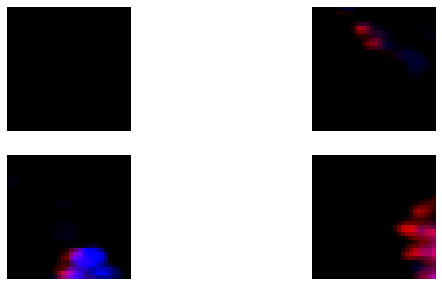

In [29]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,2,figsize=(10,5))

#id=tr_idx_pos[:2]+tr_idx_neg_resampled[:2]

id=[0,1,2,3,]

for i,ax in zip(id,axes.ravel()):
    
    ax.imshow(train_resampled[i,:,:,0:3])
    
    ax.axis('off')
    
    #if label_new[i]==0:
    
        #ax.set_title('Non Flood Sample')
        
        #ax.axis('off')
    
    #else:
        
        #ax.set_title('Flood Sample')
        
        #ax.axis('off')
    
plt.show()    

# Embedding Generator Model

## Method 1: Resnet50

In [ ]:
from tensorflow.keras.applications import resnet

from tensorflow.keras import applications

from tensorflow.keras import layers,losses,optimizers,metrics,Model

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=33

cnn=resnet.ResNet50(weights=None,input_shape=(patch_size,patch_size)+(3,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

embedding.summary()

#for layer in cnn.layers:

    
    #if 'conv5_block3' in layer.name: #training just the last convolutional block
        
        #layer.trainable=True
        
    #else:
        
        #layer.trainable=False

## Method 2: VGG16

In [62]:
from tensorflow.keras.applications import vgg16

from tensorflow.keras import layers, Model,losses, metrics, optimizers

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=vgg16.VGG16(weights=None,input_shape=(patch_size,patch_size)+(2,),include_top=False)

up_1=layers.UpSampling2D(size=(4,4))(cnn.output)

up_1=layers.BatchNormalization()(up_1)

up_2=layers.UpSampling2D(size=(4,4))(up_1)

up_2=layers.BatchNormalization()(up_2)

up_3=layers.UpSampling2D(size=(2,2))(up_2)

output=layers.BatchNormalization()(up_3)

embedding=Model(cnn.input,output,name='Embedding')

embedding.summary()

#for layer in cnn.layers:

    
    #if 'block5' in layer.name: #training just the last convolutional block
        
        #layer.trainable=True
        
    #else:
        
        #layer.trainable=False

Model: "Embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 2)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1216      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0 

In [31]:
from tensorflow.keras.applications import vgg16

from tensorflow.keras import layers, Model,losses, metrics, optimizers

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=vgg16.VGG16(weights=None,input_shape=(patch_size,patch_size)+(2,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

embedding.summary()

#for layer in cnn.layers:

    
    #if 'block5' in layer.name: #training just the last convolutional block
        
        #layer.trainable=True
        
    #else:
        
        #layer.trainable=False

Model: "Embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 2)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1216      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0 

## Method 3: Densenet

In [ ]:
from tensorflow.keras.applications import densenet

from tensorflow.keras import layers, Model,losses, metrics, optimizers

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=densenet.DenseNet121(weights='imagenet',input_shape=(patch_size,patch_size)+(3,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

#embedding.summary()

for layer in cnn.layers:

    
    if 'conv5_block16' in layer.name: #training just the last convolutional block
        
        layer.trainable=True
        
    else:
        
        layer.trainable=False 

# Method 4: Unet

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [ ]:
import tensorflow as tf

base_model=tf.keras.applications.MobileNetV2(input_shape=[96,96,3],include_top=False)

layer_names=['block_1_expand_relu',
            'block_3_expand_relu',
            'block_6_expand_relu',
            'block_13_expand_relu',
            'block_16_expand_relu']

base_model_outputs=[base_model.get_layer(name).output for name in layer_names]

#feature extraction

down_stack=tf.keras.Model(inputs=base_model.input,outputs=base_model_outputs)

print(down_stack.summary())

down_stack.trainable=False

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

up_stack=[pix2pix.upsample(512,3),
           
          pix2pix.upsample(256,3),
           
           pix2pix.upsample(128,3),
           
           pix2pix.upsample(64,3)
           
          ]

In [ ]:
import tensorflow as tf

def unet_model(output_channels:int): #output_channels: number of classes
    
    inputs=tf.keras.layers.Input(shape=[96,96,3])
    
    skips=down_stack(inputs)
    
    x=skips[-1]
    
    skips=reversed(skips[:-1])
    
    for up,skip in zip(up_stack,skips):
        
        x=up(x)
        
        concat=tf.keras.layers.Concatenate()
        
        print(x.shape,skip.shape)
        
        x=concat([x,skip])
        
        last=tf.keras.layers.Conv2DTranspose(filters=output_channels,kernel_size=3,strides=2,padding='same')
        
        x=last(x)
        
    return(tf.keras.Model(inputs=inputs,outputs=x)) 

num_classes=2

embedding=unet_model(output_channels=num_classes)

## Method : Conventional CNN Layers

In [ ]:
embedding_dim=256
patch_size=32

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

embedding=Sequential([Conv2D(32,kernel_size=3,activation='relu',input_shape=(patch_size,patch_size,3)),
                     
                         Conv2D(32,kernel_size=3,activation='relu'),
                            
                         Conv2D(32,kernel_size=3,strides=2,padding='same',activation='relu'),
                      
                         Conv2D(64,kernel_size=3,activation='relu'),
                      
                         GlobalAveragePooling2D(),
                      
                         Dense(embedding_dim) 

])

print(embedding.summary())

### Creating Siamese Network Architecture With Triplets Of Anchor, Positive, and Negative Image Patches as Input

In [63]:
from tensorflow.keras.applications import resnet

from tensorflow.keras import applications

from tensorflow.keras import layers,losses,optimizers,metrics,Model

import tensorflow as tf

from tensorflow.keras.utils import plot_model

patch_size=32

anchor_input=layers.Input(name='anchor',shape=(patch_size,patch_size)+(2,))

positive_input=layers.Input(name='positive',shape=(patch_size,patch_size)+(2,))

negative_input=layers.Input(name='negative',shape=(patch_size,patch_size)+(2,))

embedding_anchor=embedding(anchor_input)
embedding_positive=embedding(positive_input)
embedding_negative=embedding(negative_input)

#output=layers.concatenate([embedding_anchor,embedding_positive,embedding_negative])
output=layers.concatenate([embedding_positive,embedding_negative])

#model=Model([anchor_input,positive_input,negative_input],output)
model=Model([positive_input,negative_input],output)

#plot_model(model,to_file='D:/Nafiseh/flood_proposal/siamese_model_contrastive_loss_intensity_coh.png',show_shapes=True,show_layer_names=True)

# Function Creating Triplets Of Anchor, Positive, and Negative Patches

In [33]:
import random

from keras.preprocessing.image import ImageDataGenerator


def create_batch_data(train_resampled,label,batch_size):
    
        
    def data_augmentation(data,image_count=1):

        augmented_images=[]
        
        patch_size=32

        datagen=ImageDataGenerator(horizontal_flip=True)

        it=datagen.flow(np.expand_dims(data,axis=0),batch_size=1)

        for i in range(image_count):
    
            augmented_images.append(np.squeeze(it.next(),axis=0))
        
        return(np.stack(augmented_images)) 
    
    anchors,refs,events=np.zeros((batch_size,patch_size,patch_size,2)),np.zeros((batch_size,patch_size,patch_size,2)),np.zeros((batch_size,patch_size,patch_size,2))
    
    for i in range(batch_size):
 
            index=random.randint(0,len(train_resampled)-1)

            #anchor=data_augmentation(positive)

            ref=train_resampled[index,:,:,2:4]
            
            event=train_resampled[index,:,:,:2]

            anchor=data_augmentation(ref)

            anchors[i],refs[i],events[i]=anchor,ref,event
    
    return [anchors,refs,events]


In [ ]:
import random

from keras.preprocessing.image import ImageDataGenerator


def create_batch_data(train_resampled,label,batch_size):
    
        
    def data_augmentation(data,image_count=1):

        augmented_images=[]
        
        patch_size=32

        datagen=ImageDataGenerator(horizontal_flip=True)

        it=datagen.flow(np.expand_dims(data,axis=0),batch_size=1)

        for i in range(image_count):
    
            augmented_images.append(np.squeeze(it.next(),axis=0))
        
        return(np.stack(augmented_images)) 
    
    anchors,positives,negatives=np.zeros((batch_size,patch_size,patch_size,3)),np.zeros((batch_size,patch_size,patch_size,3)),np.zeros((batch_size,patch_size,patch_size,3))

    positive_idx=np.squeeze(np.where(np.array(label)==1)) 

        
    negative_idx=np.squeeze(np.where(np.array(label)==0))
    
    for i in range(batch_size):
        
        
        index=positive_idx[random.randint(0,len(positive_idx)-1)]

        positive=train_resampled[index]  
        
        anchor=data_augmentation(positive)
        
        label_=label[index]
        
        negative=train_resampled[negative_idx[random.randint(0,len(negative_idx)-1)]]
        
        anchors[i],positives[i],negatives[i]=anchor,positive,negative 
    
    return [anchors,positives,negatives]


# Triplet Loss

In [ ]:
import tensorflow as tf

def Triplet_Loss(margin, embedding_dim):
    
    def get_loss(output_true,output_pred):
        
        anchor_output=output_pred[:,:embedding_dim]
        
        positive_output=output_pred[:,embedding_dim:2*embedding_dim]
        
        negative_output=output_pred[:,2*embedding_dim:]
        
        dp=tf.reduce_sum(tf.square(anchor_output-positive_output),axis=1)
        
        dn=tf.reduce_sum(tf.square(anchor_output-negative_output),axis=1)
        
        return tf.maximum(dp-dn+margin,0)
        
    return get_loss    

# Contrastive Loss

In [65]:
def Contrastive_Loss(margin,embedding_dim,tav): #tav:maximum acceptable distance between similar samples
    
    def get_loss(output_true,output_pred):
        
        #print(output_pred.shape)
        
        input1=output_pred[:,:,:,:embedding_dim]
        
        input2=output_pred[:,:,:,embedding_dim:2*embedding_dim]
        
        d=tf.reduce_sum(tf.square(input1-input2))
        
        return(output_true*tf.maximum(margin-d,0)+(1-output_true)*tf.maximum(d-tav,0))  
    
    return get_loss

In [ ]:
def Contrastive_Loss(margin,embedding_dim,tav): #tav:maximum acceptable distance between similar samples
    
    def get_loss(output_true,output_pred):
        
        input1=output_pred[:,:embedding_dim]
        
        input2=output_pred[:,embedding_dim:2*embedding_dim]
        
        d=tf.reduce_sum(tf.square(input1-input2))
        
        return(output_true*tf.maximum(margin-d,0)+(1-output_true)*tf.maximum(d-tav,0))  
    
    return get_loss

# Weighted Double Margin Contrastive Loss (WDMCL)

In [ ]:
def Weighted_Double_Margin_Contrastive_Loss(embedding_dim,w1,w2 ,m1=0.9,m2=0.45):
    
    def get_loss(output_true,output_pred):

        
        input1=output_pred[:,:embedding_dim]
    
        input2=output_pred[:,embedding_dim:2*embedding_dim]
        
        d=tf.reduce_sum(tf.square(input1-input2))
        
        return(0.5*((w1*(1-output_true)*(tf.maximum(d-m1,0))**2)+(w2*output_true*(tf.maximum(m2-d,0))**2)))
    
    return(get_loss)       

In [66]:
def Data_Generator(train_resampled,label,batch_size,embedding_dim,mode):
    
    while True:
    
        x=create_batch_data(train_resampled,label,batch_size)
        
        if mode=='triplet':
        
            y=np.zeros((batch_size,32,32,512*3))
            
        else:
            
            x=x[1:]
            
            y=np.zeros((batch_size,32,32,512*2))
        
        yield x,y

In [ ]:
def Data_Generator(train_resampled,label,batch_size,embedding_dim,mode):
    
    while True:
    
        x=create_batch_data(train_resampled,label,batch_size)
        
        if mode=='triplet':
        
            y=np.zeros((batch_size,3*embedding_dim))
            
        else:
            
            x=x[1:]
            
            y=np.zeros((batch_size,2*embedding_dim))
        
        yield x,y

# Apply PCA transfrom on training data

In [ ]:
from sklearn.decomposition import PCA


def apply_pca_transform(data,n_components=3,patch_size=32):

    def make_2d_feature_map_1d(data):

        data_ravel=np.zeros((data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))

        for i in range(data.shape[0]):

            for j in range(data.shape[3]):

                 data_ravel[i,:,j]=np.ravel(data[i,:,:,j])

        return(data_ravel)      


    data_1d=make_2d_feature_map_1d(data)

    data_transformed=[]
    data_transformed_2d=[]

    pca=PCA(n_components=3)

    for k in range(data_1d.shape[0]):

        data_transformed.append(pca.fit_transform(data_1d[k,:,:]))

        data_transformed_2d.append(np.reshape(data_transformed[k],(patch_size,patch_size,n_components)))
      
    return(np.array(data_transformed_2d))

train_resampled__=apply_pca_transform(train_resampled_)
val_resampled__=apply_pca_transform(val_resampled)

# Normalization

In [40]:
def normalize_data(data_resampled,mode):
    
    for i in range(data_resampled.shape[0]):

            if len(data_resampled.shape)==4:
                
                for j in range(data_resampled.shape[3]):

                    a=data_resampled[i,:,:,j]

                    min_,max_=np.min(np.ravel(data_resampled[i,:,:,j])),np.max(np.ravel(data_resampled[i,:,:,j]))

                    data_resampled[i,:,:,j]=(a-min_)/(max_-min_)
                
            elif len(data_resampled.shape)==2: 
                
                a=data_resampled[i,:]

                min_,max_=np.min(np.ravel(data_resampled[i,:])),np.max(np.ravel(data_resampled[i,:]))

                data_resampled[i,:]=(a-min_)/(max_-min_)

    print(f' {mode} Data Shape: {data_resampled.shape}') 
    
    return(data_resampled)

train_resampled_=np.nan_to_num(normalize_data(train_resampled_,'Train'))

#val_resampled=np.nan_to_num(normalize_data(val_resampled,'Validation'))

#test_resampled=np.nan_to_num(normalize_data(test_resampled, 'Test'))

C:\Users\nghasem2\AppData\Local\Temp\ipykernel_18212\3093052114.py:13: RuntimeWarning: invalid value encountered in true_divide
  data_resampled[i,:,:,j]=(a-min_)/(max_-min_)


 Train Data Shape: (1452, 32, 32, 5)


In [41]:
print(np.min(train_resampled),np.max(train_resampled))

print(np.min(val_resampled),np.max(val_resampled))

print(np.min(test_resampled),np.max(test_resampled))

0.0 1.0
0.0 1.0
0.0 1.0


In [51]:
print(train_label.shape,train_resampled_.shape)

Data_Generator(train_resampled_,train_label,batch_size,embedding_dim,'contrastive')

(1452, 32, 32, 1) (1452, 32, 32, 5)


<generator object Data_Generator at 0x0000023F8B60C890>

# Fitting The Siamese Model and Setting Training Parameters

In [67]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split


#train_resampled__s,_,train_label_s,_=train_test_split(train_resampled_,train_label,stratify=train_label,test_size=0.96,random_state=1)

#val_resampled__s,_,val_label_s,_=train_test_split(val_resampled,val_label,stratify=val_label,test_size=0.96,random_state=1)


batch_size,embedding_dim, epochs=5, 512, 200

lr_schedule=ExponentialDecay(0.001,decay_rate=0.8,decay_steps=10000)

#model.compile(loss=Triplet_Loss(margin=0.9, embedding_dim=embedding_dim),optimizer=Adam(learning_rate=lr_schedule))

        
#w1=1/(len(train_label_s[train_label_s==0])) # weight for unchanged pixels
        
#w2=1/(len(train_label_s[train_label_s==1])) # weight for changed pixels

w1=1/(len(train_label[train_label==0])) # weight for unchanged pixels
        
w2=1/(len(train_label[train_label==1])) # weight for changed pixels


#Weighted_Double_Margin_Contrastive_Loss(embedding_dim,w1,w2,m1=0.9,m2=0.45)
model.compile(loss=Contrastive_Loss(embedding_dim=embedding_dim,margin=0.01,tav=0.01),optimizer=Adam(learning_rate=lr_schedule))

es=EarlyStopping(monitor='val_loss',patience=30,min_delta=1e-3,restore_best_weights=True)

mch=ModelCheckpoint(filepath='D:/Nafiseh/flood_proposal/RCM_Abbotsford_suburban_contrastive_loss_fe_2d_2.h5',save_best_only=True)

#val_data=create_batch_data(val_resampled__s,val_label_s,val_resampled__s.shape[0])

val_data=create_batch_data(val_resampled,val_label,val_resampled.shape[0])

val_data=val_data[1:] #omitting the anchor images2

#history=model.fit(Data_Generator(train_resampled__s,train_label_s,batch_size,embedding_dim,'contrastive'),steps_per_epoch=int(train_resampled__s.shape[0]/batch_size),epochs=epochs,callbacks=[es,mch],validation_data=(val_data,val_label_s))

history=model.fit(Data_Generator(train_resampled_,train_label,batch_size,embedding_dim,'contrastive'),steps_per_epoch=int(train_resampled_.shape[0]/batch_size),epochs=epochs,callbacks=[es,mch],validation_data=(val_data,val_label))

Epoch 1/200
290/290 [==============================] - 52s 105ms/step - loss: 1628682.1250 - val_loss: 14242603.0000
Epoch 2/200
290/290 [==============================] - 30s 102ms/step - loss: 926454.3750 - val_loss: 6410776.5000
Epoch 3/200
290/290 [==============================] - 30s 102ms/step - loss: 530033.4375 - val_loss: 3290016.5000
Epoch 4/200
290/290 [==============================] - 29s 102ms/step - loss: 262561.3125 - val_loss: 878974.1250
Epoch 5/200
290/290 [==============================] - 29s 101ms/step - loss: 120730.1641 - val_loss: 214067.1562
Epoch 6/200
290/290 [==============================] - 30s 102ms/step - loss: 56375.0898 - val_loss: 97415.8750
Epoch 7/200
290/290 [==============================] - 29s 101ms/step - loss: 21455.1602 - val_loss: 61544.9258
Epoch 8/200
290/290 [==============================] - 29s 101ms/step - loss: 8680.6748 - val_loss: 18433.0703
Epoch 9/200
290/290 [==============================] - 29s 101ms/step - loss: 2838.0803 - 

In [ ]:
import numpy as np

files=np.load('D:/Nafiseh/flood_proposal/leverkhuzen_saved_arrays.npz')

train_resampled__,train_label,val_resampled__,val_data,val_label,embedding_dim=files['arr_0'],files['arr_1'],files['arr_2'],files['arr_3'],files['arr_4'],files['arr_5']

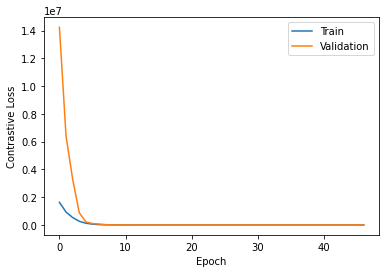

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')

plt.ylabel('Contrastive Loss')

plt.legend(['Train','Validation'])

plt.show()

In [69]:
model.save('D:/Nafiseh/flood_proposal/siamese_RCM_intensity_vgg16_suburban_fe_2d_2.h5')

In [ ]:
from tensorflow.keras.models import load_model

#model=load_model('D:/Nafiseh/flood_proposal/siamese_intensity_coh_partial_TR_contrastive_loss_downsampling.h5',compile=False)
model=load_model('D:/Nafiseh/flood_proposal/RCM_Abbotsford_suburban_contrastive_loss_fe_2d.h5',compile=False)

In [70]:
import pickle

with open('D:/Nafiseh/flood_proposal/RCM_Abbotsford_suburban_contrastive_loss_fe_2d_2.pckl', 'wb') as hist:
    
    pickle.dump(history.history,hist)

In [ ]:
import pickle

f=open('D:/Nafiseh/flood_proposal/RCM_Abbotsford_suburban_contrastive_loss_fe_2d_2.pckl','rb')

history=pickle.load(f)

f.close()

# Prediction

In [71]:
from sklearn.utils import shuffle

from tensorflow.keras.layers import LeakyReLU,Conv2D,Dropout

from tensorflow.keras import layers,Model,regularizers

embedding_dim=512

patch_size=32

input_layer=layers.Input(shape=(patch_size,patch_size,2*embedding_dim))

conv1=layers.Conv2D(64,(3,3),padding='same',activation='relu')(input_layer)

#LR1=LeakyReLU(alpha=0.1)(dense1)

conv2=layers.Conv2D(32,(3,3),padding='same', activation='relu')(conv1)

#LR2=LeakyReLU(alpha=0.1)(dense2)

drop1=layers.Dropout(0.1)(conv2)

conv3=Conv2D(16,(3,3),padding='same',activation='relu')(drop1)

drop2=layers.Dropout(0.1)(conv3)

#LR6=LeakyReLU(alpha=0.1)(dense6)

prediction_layer=layers.Conv2D(2,(1,1),activation='softmax')(drop2)

model1=Model(input_layer,prediction_layer,name='prediction_model')

print(model1.summary())

Model: "prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1024)]    0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        589888    
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 2)    

In [72]:
train_data=create_batch_data(train_resampled_,train_label,train_resampled_.shape[0])

train_data=train_data[1:] #omitting the anchor images

##train_label_pos,train_label_neg=train_label[np.where(train_label==0)[0]],train_label[np.where(train_label==1)[0]]

def predict_patch_by_patch(model,train_data):

    batch_size=1

    train_prediction=[]

    for i in range(0,train_data[0].shape[0],batch_size):

        train_prediction.append(model.predict([train_data[0][i:i+batch_size],train_data[1][i:i+batch_size]]))

    train_prediction=np.vstack(train_prediction)
    
    return(train_prediction)


train_prediction=predict_patch_by_patch(model,train_data)
#val_prediction=model.predict(val_data)
val_prediction=predict_patch_by_patch(model,val_data)

In [ ]:
from sklearn.utils import shuffle

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras import layers,Model,regularizers

embedding_dim=512

patch_size=32

input_layer=layers.Input(shape=(embedding_dim,))

flatten1=layers.Flatten()(input_layer)

dense1=layers.Dense(256,activation='tanh')(flatten1)

#LR1=LeakyReLU(alpha=0.1)(dense1)

dense2=layers.Dense(128,activation='tanh')(dense1)

#LR2=LeakyReLU(alpha=0.1)(dense2)

drop1=layers.Dropout(0.1)(dense2)

#dense3=layers.Dense(128,kernel_regularizer=regularizers.l1(0.0001))(drop1)

#dense3=layers.Dense(128)(drop1)

#LR3=LeakyReLU(alpha=0.1)(dense3)

#drop2=layers.Dropout(0.5)(LR3)

#dense4=layers.Dense(64,kernel_regularizer=regularizers.l1(0.0001))(drop2)

#dense4=layers.Dense(64)(drop2)

#LR4=LeakyReLU(alpha=0.1)(dense4)

dense5=layers.Dense(64,activation='tanh')(drop1)

#LR5=LeakyReLU(alpha=0.1)(dense5)

#dense6=layers.Dense(32)(LR5)

#LR6=LeakyReLU(alpha=0.1)(dense6)

prediction_layer=layers.Dense(2,activation='softmax')(dense5)

model1=Model(input_layer,prediction_layer,name='prediction_model')


train_data=create_batch_data(train_resampled_,train_label,train_resampled_.shape[0])

train_data=train_data[1:] #omitting the anchor images

##train_label_pos,train_label_neg=train_label[np.where(train_label==0)[0]],train_label[np.where(train_label==1)[0]]

batch_size=1000

train_prediction=[]

for i in range(0,train_data[0].shape[0],batch_size):

    train_prediction.append(model.predict([train_data[0][i:i+batch_size],train_data[1][i:i+batch_size]]))

train_prediction=np.vstack(train_prediction)
val_prediction=model.predict(val_data)

# Senario 1: Difference Feature Vectors As Trainin Data to the Network

In [ ]:
train_diff_pos=train_prediction[:,:embedding_dim]-train_prediction[:,embedding_dim:2*embedding_dim]

train_diff_neg=train_prediction[:,:embedding_dim]-train_prediction[:,2*embedding_dim:]

train_diff=np.concatenate((train_diff_pos,train_diff_neg),axis=0)

train_diff_label=np.concatenate((np.zeros((len(train_diff_pos),)),np.ones((len(train_diff_neg),))),axis=0)

val_diff_pos=val_prediction[:,:embedding_dim]-val_prediction[:,embedding_dim:2*embedding_dim]

val_diff_neg=val_prediction[:,:embedding_dim]-val_prediction[:,2*embedding_dim:]

val_diff=np.concatenate((val_diff_pos,val_diff_neg),axis=0)

val_diff_label=np.concatenate((np.zeros((len(val_diff_pos),)),np.ones((len(val_diff_neg),))),axis=0)

# Senario 2: The Original Feature Vectors As Training Data to the Network

In [ ]:
anchor_f=train_prediction[:,:embedding_dim]
pos_f=train_prediction[:,embedding_dim:2*embedding_dim]
neg_f=train_prediction[:,2*embedding_dim:]
train_pos,train_neg=np.concatenate((anchor_f,pos_f),axis=0),neg_f
train_fv=np.concatenate((train_pos,train_neg),axis=0)

pos_num=len(anchor_f)+len(pos_f)
neg_num=len(neg_f)
train_fv_label=np.concatenate((np.zeros((pos_num,)),np.ones((neg_num,))),axis=0)

anchor_f_val,pos_f_val=val_prediction[:,:embedding_dim],val_prediction[:,embedding_dim:2*embedding_dim]
neg_f_val=val_prediction[:,2*embedding_dim:]
val_pos,val_neg=np.concatenate((anchor_f_val,pos_f_val),axis=0),neg_f_val
val_fv=np.concatenate((val_pos,val_neg),axis=0)
pos_num_val=len(anchor_f_val)+len(pos_f_val)
neg_num_val=len(neg_f_val)
val_fv_label=np.concatenate((np.zeros((pos_num_val,)),np.ones((neg_num_val,))),axis=0)

In [ ]:
train_fv,val_fv=train_prediction,val_prediction

train_fv_label,val_fv_label=train_label,val_label

In [ ]:
pos_f=train_prediction[:,:embedding_dim]
neg_f=train_prediction[:,embedding_dim:]
train_fv=np.concatenate((pos_f,neg_f),axis=0)

pos_num=len(pos_f)
neg_num=len(neg_f)
train_fv_label=np.concatenate((np.zeros((pos_num,)),np.ones((neg_num,))),axis=0)

pos_f_val,neg_f_val=val_prediction[:,:embedding_dim],val_prediction[:,embedding_dim:]
val_fv=np.concatenate((pos_f_val,neg_f_val),axis=0)
pos_num_val=len(pos_f_val)
neg_num_val=len(neg_f_val)
val_fv_label=np.concatenate((np.zeros((pos_num_val,)),np.ones((neg_num_val,))),axis=0)

In [ ]:
def extract_feature_vector(prediction,label,embedding_dim=256):

    fv=[]

    for i in range(prediction.shape[0]):

        if label[i]==1: #change

           fv.append(prediction[i,embedding_dim:])

        elif label[i]==0: #background

           fv.append(prediction[i,:embedding_dim]) 
            
            
    return(np.stack(fv))


train_fv=extract_feature_vector(train_prediction,train_label)

val_fv=extract_feature_vector(val_prediction,val_label)

# Normalize Extracted Feature Maps

In [ ]:
def min_max_normalize(temp):

    for i in range(temp.shape[0]):   

        temp[i,:]=(temp[i,:]-np.min(temp[i,:]))/(np.max(temp[i,:])-np.min(temp[i,:]))
        
    return(temp)    


train_fv_n=min_max_normalize(train_fv)

val_fv_n=min_max_normalize(val_fv)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam,SGD,Adadelta

from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers.schedules import ExponentialDecay

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()

#anchor_embedding_train,positive_embedding_train,negative_embedding_train=train_prediction[:,:256],train_prediction[:,256:2*256],train_prediction[:,2*256:3*256]

#embedding_t,label_t=shuffle(np.concatenate((positive_embedding_train,negative_embedding_train),axis=0),np.concatenate((train_label_pos,train_label_neg),axis=0),random_state=2)

batch_size=5


lr_Schedule1=ExponentialDecay(0.0001,decay_rate=0.8,decay_steps=1000)

es1=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=30,restore_best_weights=True)

model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr_Schedule1),metrics=['accuracy'])

history1=model1.fit_generator(datagen.flow(train_prediction, to_categorical(train_label,num_classes=2), batch_size=batch_size), 
                    epochs=epochs, # one forward/backward pass of training data
                    steps_per_epoch=train_prediction.shape[0]//batch_size, # number of images comprising of one epoch
                    validation_data=(val_prediction, to_categorical(val_label,num_classes=2))) # data for validation               

#history1=model1.fit(train_prediction[:50].astype('float'),to_categorical(train_label[:50],num_classes=2).astype('int'),batch_size=1, epochs=300,callbacks=[es1],validation_data=(val_prediction[:20],to_categorical(val_label[:20].astype('float'),num_classes=2).astype('int')))

Epoch 1/200


C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1452, 32, 32, 1024) (1024 channels).
  warnings.warn('NumpyArrayIterator is set to use the '
C:\Users\nghasem2\AppData\Local\Temp\ipykernel_18212\893236032.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(datagen.flow(train_prediction, to_categorical(train_label,num_classes=2), batch_size=batch_size),


290/290 [==============================] - 9s 28ms/step - loss: 0.6919 - accuracy: 0.5471 - val_loss: 0.6889 - val_accuracy: 0.5657
Epoch 2/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6898 - accuracy: 0.5464 - val_loss: 0.6865 - val_accuracy: 0.5657
Epoch 3/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6894 - accuracy: 0.5462 - val_loss: 0.6857 - val_accuracy: 0.5657
Epoch 4/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6893 - accuracy: 0.5465 - val_loss: 0.6858 - val_accuracy: 0.5657
Epoch 5/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6894 - accuracy: 0.5459 - val_loss: 0.6858 - val_accuracy: 0.5657
Epoch 6/200
290/290 [==============================] - 6s 22ms/step - loss: 0.6892 - accuracy: 0.5463 - val_loss: 0.6858 - val_accuracy: 0.5657
Epoch 7/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6892 - accuracy: 0.5468 - val_loss: 0.6856 - val_accuracy: 0.5657
Epoc

290/290 [==============================] - 6s 22ms/step - loss: 0.6891 - accuracy: 0.5458 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 114/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6888 - accuracy: 0.5474 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 115/200
290/290 [==============================] - 6s 22ms/step - loss: 0.6889 - accuracy: 0.5469 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 116/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6892 - accuracy: 0.5452 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 117/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6889 - accuracy: 0.5469 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 118/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6890 - accuracy: 0.5462 - val_loss: 0.6855 - val_accuracy: 0.5657
Epoch 119/200
290/290 [==============================] - 6s 21ms/step - loss: 0.6890 - accuracy: 0.5465 - val_loss: 0.6855 - val_accuracy:

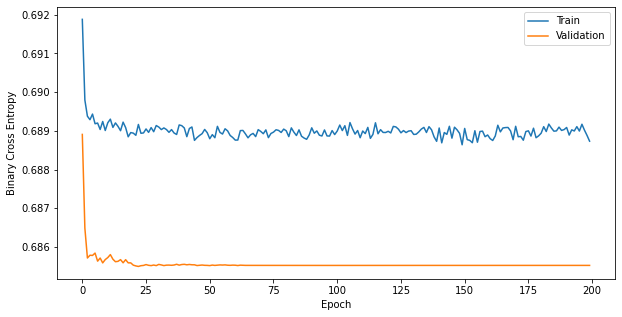

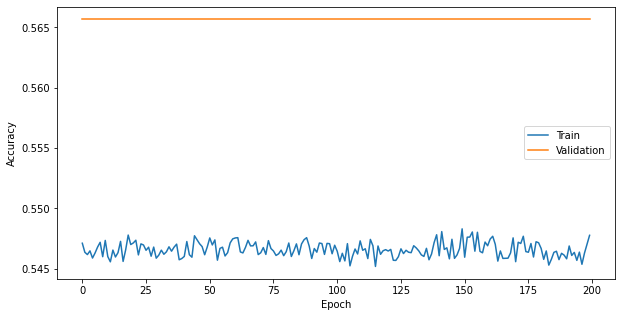

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(history1.history['loss'])

plt.plot(history1.history['val_loss'])

plt.xlabel('Epoch')

plt.ylabel('Binary Cross Entropy')

plt.legend(['Train','Validation'])


plt.figure(figsize=(10,5))

plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend(['Train','Validation'])

plt.show()

In [75]:
model1.save('D:/Nafiseh/flood_proposal/prediction_layer_int_RCM_contrastive_loss_suburban_fe_2d_2.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU

model1=load_model('D:/Nafiseh/flood_proposal/prediction_layer_int_RCM_contrastive_loss_suburban_fe_2d.h5',compile=False)

In [76]:
import pickle

with open('D:/Nafiseh/flood_proposal/prediction_layer_int_RCM_contrastive_loss_suburban_fe_2d_2.pckl','wb') as hist:
    
    pickle.dump(history1.history,hist)

In [ ]:
import pickle

f=open('D:/Nafiseh/flood_proposal/prediction_layer_int_RCM_contrastive_loss_suburban_fe_2d.pckl','rb')

history1=pickle.load(f)

f.close()

# Training Resnet50 From Scratch

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD


batch_size,embedding_dim, epochs=50, 256, 200
es=EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

lr_schedule=ExponentialDecay(0.0001,decay_rate=0.8,decay_steps=10000)

model.compile(loss=Triplet_Loss(margin=0.9, embedding_dim=embedding_dim),optimizer=Adam(learning_rate=lr_schedule))

es1=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=100,restore_best_weights=True)

embedding.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr_Schedule),metrics=['accuracy'])

history1=embedding.fit(train_resampled__s,to_categorical(train_label_s,num_classes=2),batch_size=80, epochs=300,callbacks=[es1],validation_data=(val_resampled__s,to_categorical(val_label_s,num_classes=2)))

In [ ]:
def create_change_map(model,model1,train_data,test_resampled,label_test_new,embedding_dim):

    test_label_p=[]
    
    #preflood_resampled_expanded=preflood_resampled

    for i in range(len(test_resampled)):
        
        embedding_input=np.expand_dims(test_resampled[i],axis=0)
        
        if i>=len(train_data[0]): #end of the train data
            
            if i%len(train_data[0])==0:
                
               k=0 

            train_anchor=np.expand_dims(train_data[0][k,:,:,:],axis=0)
            
            train_pos=np.expand_dims(train_data[1][k,:,:,:],axis=0)
            
            train_neg=np.expand_dims(train_data[2][k,:,:,:],axis=0)
            
            k+=1
        
        else:
            

            train_anchor=np.expand_dims(train_data[0][i,:,:,:],axis=0)

            train_pos=np.expand_dims(train_data[1][i,:,:,:],axis=0)

            train_neg=np.expand_dims(train_data[2][i,:,:,:],axis=0)

        if label_test_new[i]==1: #change

            embedding=model.predict([train_anchor,train_pos,embedding_input])
            
        elif label_test_new[i]==0: #no change

            embedding=model.predict([train_anchor,embedding_input,train_neg])
        
        #prediction=np.expand_dims(prediction,axis=0)
        
        if label_test_new[i]==1: #change

            test_label_p.append(np.argmax(model1.predict(embedding[:,2*embedding_dim:])))
        
        elif label_test_new[i]==0: #no change
            
            test_label_p.append(np.argmax(model1.predict(embedding[:,embedding_dim:2*embedding_dim])))
            
                            
    return(test_label_p) 

chunks=1000

test_label_pp=[]

for s in range(0,len(test_sample),chunks):
    
    test_resampled,label_test_new=resample_data(test_sample[s:s+chunks],label_test[s:s+chunks],'Test')

    test_resampled__=apply_pca_transform(test_resampled)

#test_label_p=create_change_map(embedding,model1,train_data,test_resampled__,label_test_new,embedding_dim) #embedding do the same job as model

    test_label_pp.append(create_change_map(model,model1,train_data,test_resampled__,label_test_new,embedding_dim)) 

In [77]:
def create_change_map(model,model1,test_resampled,label_test_new,embedding_dim):

    test_label_p=[]
    
    #preflood_resampled_expanded=preflood_resampled

    for i in range(len(test_resampled)):
        
        embedding_input=np.expand_dims(test_resampled[i],axis=0)
        
        #if i>=len(train_data[0]): #end of the train data
            
            #if i%len(train_data[0])==0:
                
               #k=0 
            
            #train_pos=np.expand_dims(train_data[0][k,:,:,:],axis=0)
            
            #train_neg=np.expand_dims(train_data[1][k,:,:,:],axis=0)
            
            #k+=1
        
        #else:

            #train_pos=np.expand_dims(train_data[0][i,:,:,:],axis=0)

            #train_neg=np.expand_dims(train_data[1][i,:,:,:],axis=0)

        #if label_test_new[i]==1: #change

            #embedding=model.predict([train_pos,embedding_input])
            
        #elif label_test_new[i]==0: #no change

            #embedding=model.predict([embedding_input,train_neg])

            
        embedding=model.predict([embedding_input[:,:,:,2:4],embedding_input[:,:,:,:2]])
        
        ##prediction=np.expand_dims(prediction,axis=0)
        
        #if label_test_new[i]==1: #change

            #test_label_p.append(np.argmax(model1.predict(embedding[:,embedding_dim:])))
        
        #elif label_test_new[i]==0: #no change
            
            #test_label_p.append(np.argmax(model1.predict(embedding[:,:embedding_dim])))
    
        test_label_p.append(np.argmax(model1.predict(embedding),axis=3))     
            
                            
    return(test_label_p) 

#index=[]

#for i in range(0,int((len(test_sample)*2)/(col1+2))-1,2):
    
    #index.append(np.arange(i*(int((col1+2)/2)),(i+1)*(int((col1+2)/2))))
    

#f_index=np.ravel(index)  

#f_index=np.delete(f_index,-1)

#row1=stack_test_int_coh.shape[0]
#col1=stack_test_int_coh.shape[1]

#ts_array,lt_array=np.array(test_sample),np.array(label_test)

#test_resampled,label_test_new=resample_data(test_sample[s],lt_array[s],'Test')

chunks=1

embedding_dim=512

test_label_pp=[]

for s in range(0,len(test_sample),chunks):
    
    test_resampled,label_test_new=resample_data(test_sample[s:s+chunks],label_test[s:s+chunks],'Test')
    
    print(test_resampled)

    #test_resampled__=apply_pca_transform(test_resampled)

#test_label_p=create_change_map(embedding,model1,train_data,test_resampled__,label_test_new,embedding_dim) #embedding do the same job as model

    test_label_pp.append(create_change_map(model,model1,test_resampled,label_test_new,embedding_dim)) 

 Test Data Shape: (1, 32, 32, 5), Test Label Shape: (1, 32, 32, 1)
[[[[-1.13396116 -1.77354548 -1.144337   -1.34927709 13.        ]
   [-1.4434784  -2.41366867 -0.4856468  -1.80156596 13.        ]
   [-1.54458302 -2.25173172 -0.7684481  -1.17821415 13.        ]
   ...
   [-1.54458302 -2.25173172 -0.7684481  -1.17821415 13.        ]
   [-1.4434784  -2.41366867 -0.4856468  -1.80156596 13.        ]
   [-1.13396116 -1.77354548 -1.144337   -1.34927709 13.        ]]

  [[-1.33961092 -2.64655022 -0.76640524 -1.53679436 12.        ]
   [-1.27342956 -1.98040914 -0.83623237 -1.96064155 13.        ]
   [-1.83506728 -2.34571246 -0.64311312 -1.77012125 13.        ]
   ...
   [-1.83506728 -2.34571246 -0.64311312 -1.77012125 13.        ]
   [-1.27342956 -1.98040914 -0.83623237 -1.96064155 13.        ]
   [-1.33961092 -2.64655022 -0.76640524 -1.53679436 12.        ]]

  [[-1.22585244 -2.74980534 -0.77363158 -1.38159598 12.        ]
   [-1.16326209 -2.30149636 -0.62002539 -1.64270805 12.        ]
   [-

 Test Data Shape: (1, 32, 32, 5), Test Label Shape: (1, 32, 32, 1)
[[[[-1.40518957 -2.4764778  -0.75055869 -1.18879251 12.        ]
   [-0.99192428 -1.95394818 -0.55356641 -1.36245748 12.        ]
   [-1.86019722 -2.54702581 -1.17448122 -2.16155032 12.        ]
   ...
   [-1.86019722 -2.54702581 -1.17448122 -2.16155032 12.        ]
   [-0.99192428 -1.95394818 -0.55356641 -1.36245748 12.        ]
   [-1.40518957 -2.4764778  -0.75055869 -1.18879251 12.        ]]

  [[-1.5125802  -2.13112819 -1.35197205 -2.05824154 10.        ]
   [-1.74235081 -2.29244797 -1.64513317 -2.17050367 10.        ]
   [-1.74179765 -2.19105317 -1.47798127 -2.20073669 10.        ]
   ...
   [-1.74179765 -2.19105317 -1.47798127 -2.20073669 10.        ]
   [-1.74235081 -2.29244797 -1.64513317 -2.17050367 10.        ]
   [-1.5125802  -2.13112819 -1.35197205 -2.05824154 10.        ]]

  [[-1.10784118 -1.95390966 -1.1752017  -1.69923757 10.        ]
   [-1.23129452 -2.34523497 -1.2490724  -1.67502024 11.        ]
   [-

 Test Data Shape: (1, 32, 32, 5), Test Label Shape: (1, 32, 32, 1)
[[[[-1.28703084 -1.44747845 -0.70056822 -2.20104576  6.        ]
   [-0.54583316 -2.17753971 -0.63456963 -1.81059524  6.        ]
   [-0.93509851 -1.28359989 -0.85932046 -0.5552688   9.        ]
   ...
   [-0.85187157 -2.11900589  0.2609629  -1.39072583  6.        ]
   [-0.94248657 -1.62906422 -0.87167828 -1.38523277 11.        ]
   [-1.49715749 -1.88015049 -0.98336879 -1.7642348  14.        ]]

  [[-1.31668583 -2.1902294  -0.48893901 -2.12309401  6.        ]
   [-0.46130081 -0.97444378 -1.05502783 -1.40437408  7.        ]
   [-0.93877808 -1.83501529 -0.34219618 -1.63599588  9.        ]
   ...
   [-1.54758385 -2.08954643 -0.81827787 -1.69816817  8.        ]
   [-0.92503117 -1.39502322 -0.5504808  -1.83786331  8.        ]
   [-1.20025291 -1.63561444 -0.09021244 -1.51248183 14.        ]]

  [[-1.78775309 -2.52276237 -1.60581472 -2.86637147  9.        ]
   [-1.83345249 -2.50974665 -1.80498367 -2.31807379  8.        ]
   [-

 Test Data Shape: (1, 32, 32, 5), Test Label Shape: (1, 32, 32, 1)
[[[[-2.11908718 -2.36282478 -1.14952581 -1.73607591  6.        ]
   [-1.32727319 -1.78005817 -0.6088133  -1.35175772 10.        ]
   [-1.01519151 -2.25656498 -0.66228778 -1.61349697 11.        ]
   ...
   [-1.75180847 -2.42274997 -1.66540301 -2.34768271 10.        ]
   [-2.19031694 -2.91303986 -1.58053438 -2.35165868 10.        ]
   [-2.01430288 -2.28996685 -1.77776437 -2.40722688 10.        ]]

  [[-0.92914067 -1.11305038 -1.17937628 -2.24459528 10.        ]
   [-1.80020796 -2.23739889 -1.04861626 -1.1139128   6.        ]
   [-0.81510517 -1.4823858  -0.82517328 -1.67887813  7.        ]
   ...
   [-1.73395831 -2.24648394 -1.9403638  -2.32294585  9.        ]
   [-1.91027721 -2.81971773 -1.71347834 -2.51457155  9.        ]
   [-2.22624814 -2.01219184 -1.67279511 -2.56147368  9.        ]]

  [[-1.49350904 -1.97781462 -1.02573738 -2.0206425  10.        ]
   [-1.24441189 -2.0241124  -0.97034057 -1.28045214  8.        ]
   [-

 Test Data Shape: (1, 32, 32, 5), Test Label Shape: (1, 32, 32, 1)
[[[[-1.64761398 -2.35663062 -1.50735827 -2.20481969  9.        ]
   [-1.48289998 -2.42640865 -1.3078721  -1.9246431   9.        ]
   [-1.47836695 -2.73964446 -1.27493189 -2.10134383  9.        ]
   ...
   [-0.60244382 -1.92096    -0.36781485 -1.77184171 11.        ]
   [-0.56112049 -1.56438238 -0.45618735 -1.95452059 11.        ]
   [-0.46592889 -1.66511199 -1.21881926 -1.32118976 11.        ]]

  [[-1.51660671 -1.98531158 -1.15982362 -2.33982797  9.        ]
   [-1.6714082  -2.21634758 -1.84967061 -2.16783743  9.        ]
   [-1.53892071 -2.17701648 -1.84084582 -2.72786581  9.        ]
   ...
   [-0.38514227 -1.27370591 -0.72870413 -1.59231319 11.        ]
   [-0.42943621 -1.47985112 -0.99916226 -1.23049967 11.        ]
   [-0.42981111 -1.57584937 -0.88207963 -1.25323484 11.        ]]

  [[-1.75796689 -2.27324573 -1.4061851  -2.20994952  9.        ]
   [-1.44348046 -1.91515443 -1.58977826 -2.13959091  9.        ]
   [-

# Putting the Chuncks Together

In [ ]:
print(test_label_pp)

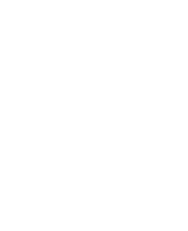

In [81]:
#nrows,ncols=992,2038
#nrows,ncols= 264, 616
#nrows,ncols=101,101
nrows,ncols=160,128


#change_map=np.reshape(np.concatenate((np.ravel(np.stack(test_label_pp[:-1])),test_label_pp[-1])),(nrows,ncols))

change_map=np.reshape(np.ravel(np.stack(test_label_pp)),(nrows,ncols))

plt.imshow(change_map,cmap=plt.cm.get_cmap('binary'))

plt.axis('off')

plt.show()

In [ ]:
import numpy as np
#np.save('D:/Nafiseh/flood_proposal/Leverkusen_change_labels_vgg16_intensity_coh_without_dem.npy', test_label_pp)
np.save('D:/Nafiseh/flood_proposal/RCM_Abbotsford_change_labels_vgg16_suburban_3.npy',test_label_pp)
#test_label_p=np.load('D:/Nafiseh/flood_proposal/RCM_Abbotsford_change_labels_vgg16_suburban.npy',allow_pickle=True)

In [ ]:
def normalize_rgb(image):
    
    for i in range(image.shape[2]):

        image[:,:,i]=np.multiply((image[:,:,i]-np.min(image[:,:,i]))/(np.max(image[:,:,i])-np.min(image[:,:,i])),255)
  
    return(image)    

# Visualizing The Result

In [ ]:
%matplotlib inline

from osgeo import gdal,osr

import matplotlib.pyplot as plt

import utm

import numpy as np

#path='D:/Nafiseh/flood_proposal'

path='//tsclient/F/RCM_Abbotsford_Rural'

#stack_image_name='subset_0_of_S1A_IW_GRDH_1SDV_Cal_Spk_TC_Stack.tif'

#stack_image_name='subset_1_of_S1A_IW_GRDH_1SDV_20190408T225218_20190507T23009_Cal_Spk_TC_Stack_2_subset.tif'

#stack_image_name='collocate_S1B_int_coh.tif'

#stack_image_name='stack_train_RCM_3_20211118_1130.tif'

stack_image_name='subset_0_of_Stack_train_RCM_3_20211118_1130.tif'

#Rapid_Eye_Image_name='0428_clip_3.tif'

#gt_name='hydrography_area_mask_leverkhuzen_clip.tif'

gt_name='New Folder/subset_0_of_FloodExtentPolygon_CAN_BC_LowerFraser_20211116_020551.tif'

gt=read_as_array(path,gt_name)

#gt=mask_union_test

#image_array=read_as_array(path,Rapid_Eye_Image_name)

ds=gdal.Open(path+'/'+stack_image_name)

#rapid_eye_ds=gdal.Open(path+'/'+Rapid_Eye_Image_name)

ulx,xres,xskew,uly,yskew,yres=ds.GetGeoTransform()

#uly_eye,yres_eye,yskew_eye,ulx_eye,xskew_eye,xres_eye=rapid_eye_ds.GetGeoTransform()

#row,col=1501,1501

#row,col=1379-1011+1,1055-505+1

#row,col=301,301

#row,col=992, 2038

row,col=101,101

#row,col=264, 616

#row_ul_new,col_ul_new=780,0
row_ul_new,col_ul_new=0, 0

#row_lr_new,col_lr_new=1080,300
row_lr_new,col_lr_new=101, 101
#row_lr_new,col_lr_new=264, 616

#gt=read_as_array(path,gt_name)


def find_new_pixel_cor(row_new,col_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye):

    x_new=col_new*xres+ulx

    y_new=row_new*yres+uly

    utm_cor=utm.from_latlon(y_new,x_new)

    y_new_utm,x_new_utm=utm_cor[0],utm_cor[1]

    row_eye=np.int(np.floor((y_new_utm-uly_eye)/yres_eye))

    col_eye=np.int(np.floor((x_new_utm-ulx_eye)/xres_eye))
    
    return(x_new,y_new,row_eye,col_eye)

#x_new,y_new,row_ul_eye,col_ul_eye=find_new_pixel_cor(row_ul_new,col_ul_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye)

#_,_,row_lr_eye,col_lr_eye=find_new_pixel_cor(row_lr_new,col_lr_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye)

#RGB_image_array=image_array[:row_lr_eye+1,col_ul_eye:col_lr_eye+1,[2,1,0]]

#ul_x_new,ul_y_new=x_new,y_new

#BBOX=[ul_x_new, ul_x_new+xres*300, ul_y_new+yres*300, ul_y_new]
#BBOX=[6.9, 6.9+xres*2038, 50.983+yres*992, 51.072]
#BBOX=[-122.237, -122.226, 49.039, 49.044]
BBOX=[-122.27, -122.27+xres*101, 49.04+yres*101, 49.04]


#change_map=np.reshape(test_label_p,(row,col))

orig_map=plt.cm.get_cmap('binary')

reversed_map=orig_map.reversed()

fig,ax=plt.subplots(1,2,figsize=(20,10))

#plt.locator_params(axis='x',nbins=len(np.round(np.arange(BBOX[0],BBOX[1],0.0005),4)))

#plt.locator_params(axis='y',nbins=len(np.round(np.arange(BBOX[2],BBOX[3],0.0005),4)))

ax[0].set_xticks(ticks=np.round(np.arange(BBOX[0],BBOX[1],0.0005),4),labels=np.round(np.arange(BBOX[0],BBOX[1],0.0005),4),fontsize=16)

ax[0].set_yticks(ticks=np.round(np.arange(BBOX[2],BBOX[3],0.0005),4),labels=np.round(np.arange(BBOX[2],BBOX[3],0.0005),4),fontsize=16)

ax[0].imshow(change_map, extent=BBOX, aspect='equal',cmap=orig_map)

#ax[0].set_title('Change Map \n 07/05/2019',fontname='Times New Roman', fontweight='bold', fontsize=14)
#ax[0].set_title('Change Map \n 18/07/2021',fontname='Times New Roman', fontweight='bold', fontsize=14)
#ax[0].set_title('Change Map \n 19/11/2021',fontname='Times New Roman',fontweight='bold',fontsize=20)
ax[0].set_title('Flood Map',fontname='Times New Roman', fontweight='bold', fontsize=20)

ax[1].set_xticks(ticks=np.round(np.arange(BBOX[0],BBOX[1],0.0005),4),labels=np.round(np.arange(BBOX[0],BBOX[1],0.0005),4),fontsize=16)

ax[1].set_yticks(ticks=np.round(np.arange(BBOX[2],BBOX[3],0.0005),4),labels=np.round(np.arange(BBOX[2],BBOX[3],0.0005),4),fontsize=16)

ax[1].imshow(gt,extent=BBOX, aspect='equal', cmap='binary')

ax[1].set_title('Ground Truth Mask',fontname='Times New Roman', fontweight='bold',fontsize=20)

#ax[2].imshow(np.divide(RGB_image_array,(8,8,8)).astype('uint8'), extent=BBOX)

#ax[2].set_title('Rapid Eye RGB image \n 28/04/2019', fontname='Times New Roman', fontweight='bold',fontsize=14)

fig.tight_layout(pad=3)

#plt.savefig('D:/Nafiseh/flood_proposal/intensity_Contrastive_Loss_Abbotsford_suburbun_3.tif')

plt.show()

# Save Change Map and Ground Truth Map as Geo Tiff

In [ ]:
from osgeo import gdal, osr

def Write_array_as_geotiff(array,ul_x_new,ul_y_new,raster_name):

    #ds=gdal.Open('D:/Nafiseh/flood_proposal/stack_train_RCM_3_20211118_1130.tif')
    
    ds=gdal.Open('D:/Nafiseh/flood_proposal/collocate_S1B_int_coh.tif')

    ulx,xres,xskew,uly,yskew,yres=ds.GetGeoTransform()

    geotransform=(ul_x_new, xres, xskew, ul_y_new, yskew, yres)

    raster=gdal.GetDriverByName('GTiff').Create(raster_name,2038,992,1,gdal.GDT_Float32)

    raster.SetGeoTransform(geotransform)

    srs=osr.SpatialReference()

    srs.ImportFromEPSG(4326)
    
    raster.GetRasterBand(1).WriteArray(array.astype('uint8'))
    
    raster.GetRasterBand(1).SetNoDataValue(0)
    
    raster.FlushCache() ##saves to disk
    
    raster=None
    
    ds=None


Write_array_as_geotiff(change_map,0,0,'D:/Nafiseh/flood_proposal/CHM_siamese_intensity_coh_Triplet_Loss.tif')

#Write_array_as_geotiff(label_test_new_2D,ul_x_new,ul_y_new,'D:/Nafiseh/flood_proposal/Change_mask_07052019.tif')

In [ ]:
test_resampled_s,label_test_s=subset(test_resampled,label_test_new)

test_data=create_batch_data(test_resampled_s,label_test_s,test_resampled_s.shape[0])

prediction=model.predict(test_data)

diff_pr_pos=prediction[:,:embedding_dim]-prediction[:,embedding_dim:2*embedding_dim]

diff_pr_neg=prediction[:,:embedding_dim]-prediction[:,2*embedding_dim:]

diff_pr=np.concatenate((diff_pr_pos,diff_pr_neg),axis=0)

#anchor_embedding_test,positive_embedding_test,negative_embedding_test=prediction[:,:256],prediction[:,256:2*256],prediction[:,2*256:3*256]

test_label_p=np.argmax(model1.predict(diff_pr),axis=1)

#dist_pos=np.square(np.expand_dims(np.sum(np.power(diff_pr_pos,2),axis=1),axis=1))
#dist_neg=np.square(np.expand_dims(np.sum(np.power(diff_pr_neg,2),axis=1),axis=1))

#diff_power=np.concatenate((dist_pos,dist_neg),axis=1)

#test_label_p2=np.argmin(diff_power,axis=1)

In [ ]:
test_resampled_s,label_test_s=subset(test_resampled,label_test_new)

test_data=create_batch_data(test_resampled_s,label_test_s,test_resampled_s.shape[0])

prediction=model.predict(test_data)

pr_anchor,pr_pos,pr_neg=prediction[:,:embedding_dim],prediction[:,embedding_dim:2*embedding_dim],prediction[:,2*embedding_dim:]

pr=np.concatenate((pr_anchor,pr_pos,pr_neg),axis=0)

test_label_p=np.argmax(model1.predict(pr),axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import seaborn as sns

plt.figure(figsize=(5,5))

gt[gt==2]=0

gt[gt==3]=1

change_map_r=zoom(change_map,[gt.shape[0]/change_map.shape[0],gt.shape[1]/change_map.shape[1]],order=0)

sns.heatmap(confusion_matrix(np.ravel(gt),np.ravel(change_map_r)),annot=True,fmt='d')

plt.savefig('D:/Nafiseh/flood_proposal/confusion_matrix_Contrastive_Loss_Abbotsford_suburbun_3.tif')

text_file=open('D:/Nafiseh/flood_proposal/classification_report_Contrastive_Loss_Abbotsford_suburbun_3.txt','a')

print(classification_report(np.ravel(gt),np.ravel(change_map_r)),file=text_file)

text_file.close()